In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Füllen der Variablen train_dir und test_dir mit den Pfaden zu den Trainings- und Testdaten
train_dir ='input/train'
test_dir ='input/test'

In [ ]:
#Füllen der Variablen train_images und test_images mit den Bilddaten
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # nur Bilddateien
            path = os.path.join(folder, filename)
            with Image.open(path) as img:
                img = img.resize((224, 224))  # Einheitliche Größe
                images[filename] = np.array(img)
    return images

# Bilder laden
train_images = load_images_from_folder(train_dir)
test_images = load_images_from_folder(test_dir)

In [ ]:
# Anzahl der Bilder im Trainings- und Testset
train_size = len(os.listdir('input/train'))
test_size = len(os.listdir('input/test'))

train_size,test_size

(10222, 10357)

In [ ]:
#Ausgabe der ersten 5 Bilder aus der csv-Datei
df = pd.read_csv('labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
#Anzeigen der Klassen (Hunderassen) und der Anzahl der Klassen
dog_breeds = sorted(df['breed'].unique())
n_classes = len(dog_breeds)
print(n_classes)
dog_breeds

120


['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [27]:
#Converting classes to numbers
class_to_num = dict(zip(dog_breeds,range(n_classes)))

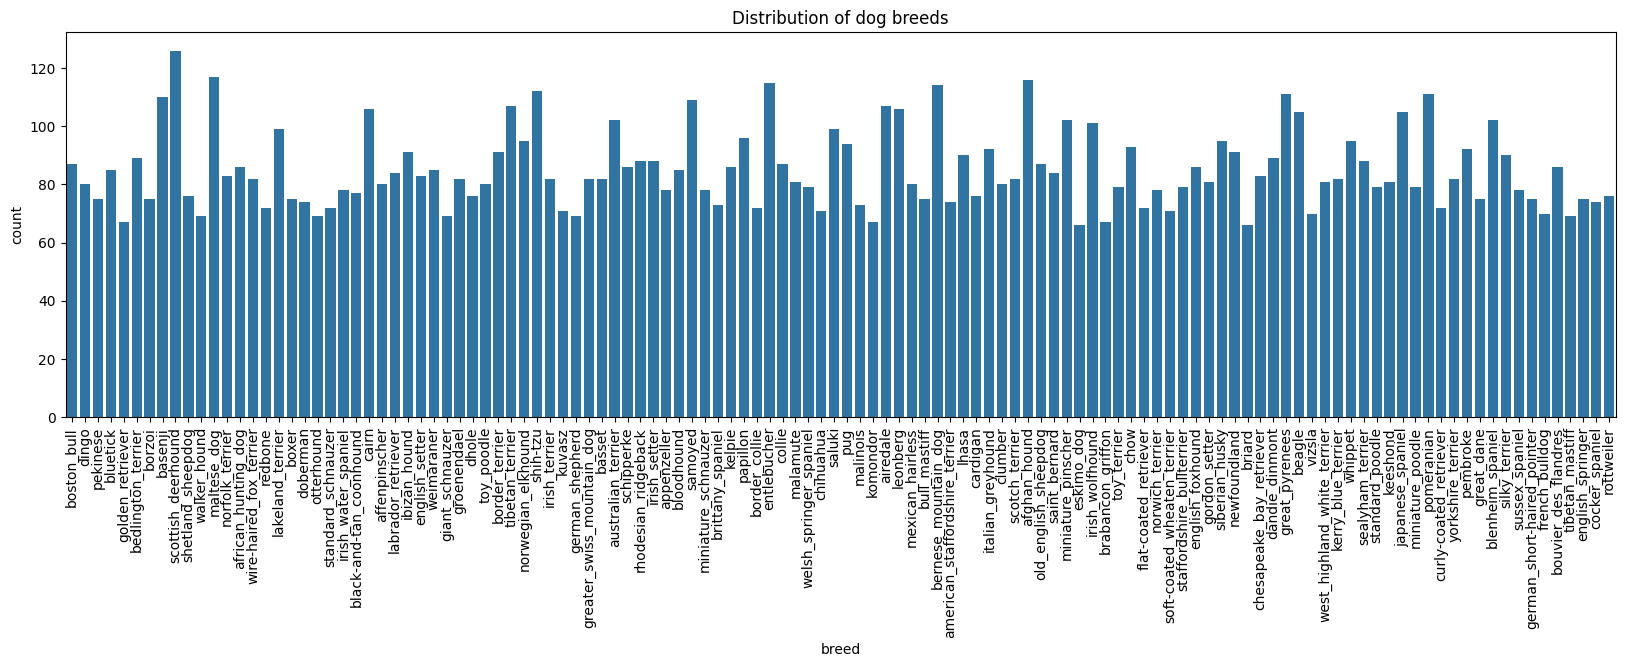

In [ ]:
#Anzeigen der Verteilung der Klassen
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(data=df, x='breed')
plt.title('Distribution of dog breeds')
plt.show()

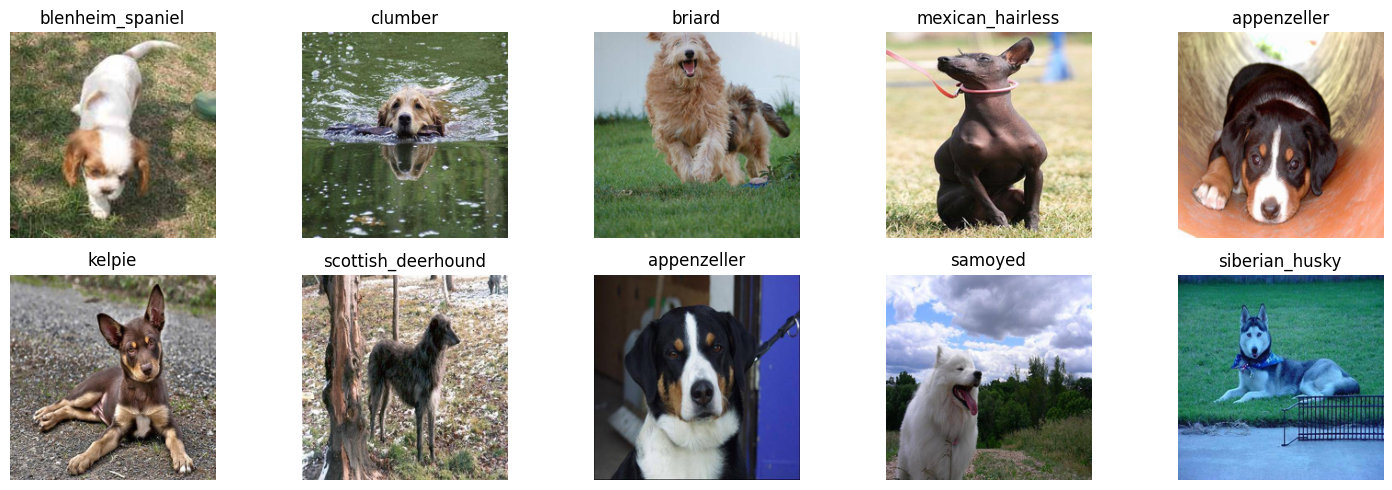

In [ ]:
#Sample 10 Bilder aus dem Trainingsset und Anzeigen der Hunderasse
sample_df = df.sample(10)
rows = 2
cols = 5

plt.figure(figsize=(15, 5))

for i, (_, row) in enumerate(sample_df.iterrows()):
    filename = (row['id'] + '.jpg').lower()
    breed = row['breed']
    image = train_images.get(filename)
    
    if image is not None:
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.title(breed)
        plt.axis('off')
    else:
        print(f"⚠️ Bild nicht gefunden: {filename}")

plt.tight_layout()
plt.show()